In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

recent_date = session.query(Measurement, Measurement.date).order_by(Measurement.date.desc()).first().date

recent_date

'2017-08-23'

<AxesSubplot:xlabel='Date', ylabel='Precip [inch]'>

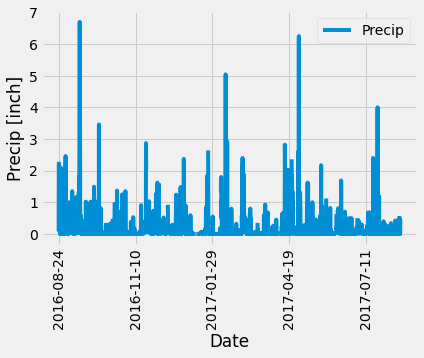

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.datetime.strptime(recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
lists = [{'Date': prec[0], 'Precip': prec[1]} for prec in precip]

# Sort the dataframe by date
dframe = pd.DataFrame(lists).set_index("Date").sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
dframe.plot(xlabel = 'Date', ylabel = 'Precip [inch]', rot ='vertical')


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dframe.describe()

,Precip
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station, Station.station).count()
station_count

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_grouped = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


stations_grouped

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active =stations_grouped[0].station

most_active_low_temp = session.query(func.min(Measurement.tobs))

most_active_high_temp = session.query(func.max(Measurement.tobs))

most_active_avg_temp = session.query(func.avg(Measurement.tobs))

print(most_active)
print(most_active_low_temp[0][0])
print(most_active_high_temp[0][0])
print(round(most_active_avg_temp[0][0],1))

USC00519281
53.0
87.0
73.1


<AxesSubplot:ylabel='Frequency'>

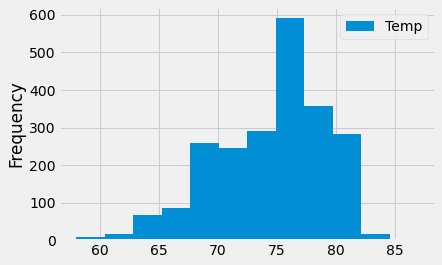

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).\
    filter(Measurement.date >= one_year)

lists2 = [{'Date': x[0], 'Temp': x[1]} for x in query]

temp_dataframe = pd.DataFrame(lists2).set_index('Date').sort_values('Date')

temp_dataframe.plot.hist(bins=12, xlabel = 'Temp')

# Close session

In [ ]:
# Close Session
session.close()